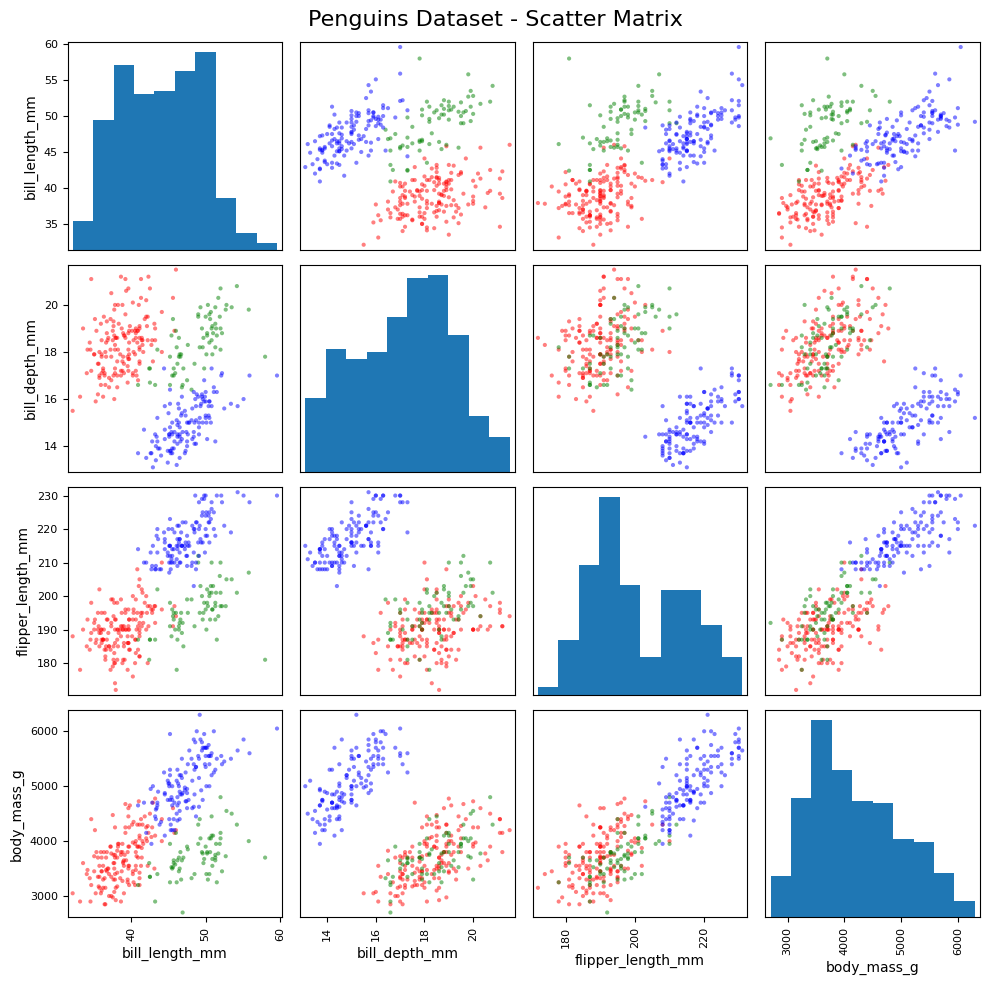

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ペンギンデータセットをロード
penguins = sns.load_dataset('penguins')

# NaN値を除去
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# カラーマップを作成
color_map = {'Adelie': 'red', 'Chinstrap': 'green', 'Gentoo': 'blue'}
colors = penguins['species'].map(color_map)

# 散布図行列を作成
scatter_matrix = pd.plotting.scatter_matrix(penguins, c=colors, figsize=(10, 10))

# グラフのタイトルを追加
plt.suptitle("Penguins Dataset - Scatter Matrix", fontsize=16)

# グラフのラベルが重ならないように調整
plt.tight_layout()

# 図を保存
plt.savefig('scatter_matrix.png')

# 散布図行列を表示
plt.show()


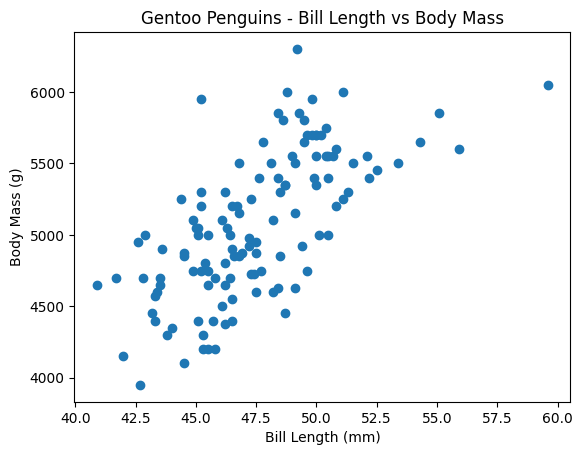

In [2]:
# ジェンツーペンギンのデータを抽出
gentoo_penguins = penguins[penguins['species'] == 'Gentoo']

# くちばしの長さと体重のデータを抽出
bill_length = gentoo_penguins['bill_length_mm']
body_mass = gentoo_penguins['body_mass_g']

# 散布図をプロット
plt.scatter(bill_length, body_mass)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Gentoo Penguins - Bill Length vs Body Mass')

# 図を保存
plt.savefig('scatter_gentoo.png')

# グラフを表示
plt.show()


Slope:  109.45916306693874
Intercept:  -123.82793265390046
Mean Squared Error:  139195.62409167975


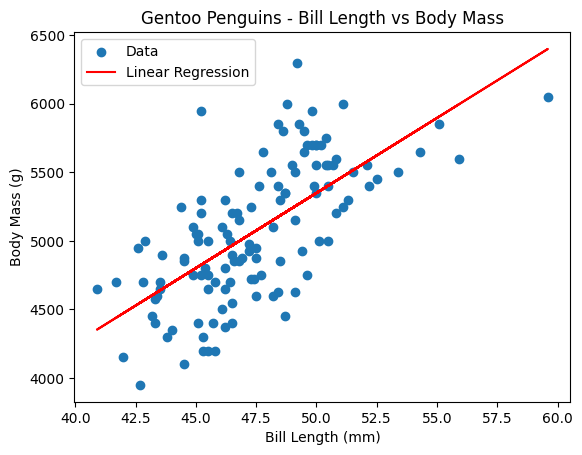

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 線形回帰モデルの訓練
reg = LinearRegression()
reg.fit(bill_length.values.reshape(-1, 1), body_mass)

# 線形回帰の結果（パラメータ）を出力
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

# 平均二乗誤差を計算
predictions = reg.predict(bill_length.values.reshape(-1, 1))
mse = mean_squared_error(body_mass, predictions)
print("Mean Squared Error: ", mse)

# 散布図をプロット
plt.scatter(bill_length, body_mass, label='Data')
plt.plot(bill_length, reg.predict(bill_length.values.reshape(-1, 1)), color='red', label='Linear Regression')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Gentoo Penguins - Bill Length vs Body Mass')
plt.legend()

# 図を保存
plt.savefig('scatter_lr.png')

# グラフを表示
plt.show()


In [5]:
from sklearn.linear_model import Ridge

# 線形回帰モデルの訓練
rg = Ridge()
rg.fit(bill_length.values.reshape(-1, 1), body_mass)

# 線形回帰の結果（パラメータ）を出力
slope = rg.coef_[0]
intercept = rg.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

# 平均二乗誤差を計算
predictions = rg.predict(bill_length.values.reshape(-1, 1))
mse = mean_squared_error(body_mass, predictions)
print("Mean Squared Error: ", mse)


Slope:  109.36478032657529
Intercept:  -119.3442920830239
Mean Squared Error:  139195.70801157953
